In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as  plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**LOADING DATA**

In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# Handle missing values for features where median/mean or most common value doesn't make sense
def missing(train):
    # Alley : data description says NA means "no alley access"
    train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
    # BedroomAbvGr : NA most likely means 0
    train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
    # BsmtQual etc : data description says NA for basement features is "no basement"
    train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
    train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
    train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
    train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
    train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
    train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
    train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
    train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
    # CentralAir : NA most likely means No
    train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
    # Condition : NA most likely means Normal
    train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
    train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
    # EnclosedPorch : NA most likely means no enclosed porch
    train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
    # External stuff : NA most likely means average
    train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
    train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
    # Fence : data description says NA means "no fence"
    train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
    # FireplaceQu : data description says NA means "no fireplace"
    train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
    train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
    # Functional : data description says NA means typical
    train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
    # GarageType etc : data description says NA for garage features is "no garage"
    train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
    train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
    train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
    train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
    train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
    train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
    # HalfBath : NA most likely means no half baths above grade
    train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
    # HeatingQC : NA most likely means typical
    train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
    # KitchenAbvGr : NA most likely means 0
    train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
    # KitchenQual : NA most likely means typical
    train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
    # LotFrontage : NA most likely means no lot frontage
    train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
    # LotShape : NA most likely means regular
    train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
    # MasVnrType : NA most likely means no veneer
    train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
    train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
    # MiscFeature : data description says NA means "no misc feature"
    train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
    train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
    # OpenPorchSF : NA most likely means no open porch
    train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
    # PavedDrive : NA most likely means not paved
    train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
    # PoolQC : data description says NA means "no pool"
    train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
    train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
    # SaleCondition : NA most likely means normal sale
    train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
    # ScreenPorch : NA most likely means no screen porch
    train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
    # TotRmsAbvGrd : NA most likely means 0
    train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
    # Utilities : NA most likely means all public utilities
    train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")
    # WoodDeckSF : NA most likely means no wood deck
    train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)
    # Some numerical features are actually really categories
    train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                           50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                           80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                           150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                           "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                       7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                          })





    # Encode some categorical features as ordered numbers when there is information in the order
    train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )
    # Create new features
    # 1* Simplifications of existing features
    train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
    train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
    train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                                 3 : 2, 4 : 2 # good
                                                })
    train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
    train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
    train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        })
    train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

    # 2* Combinations of existing features
    # Overall quality of the house
    train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
    # Overall quality of the garage
    train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
    # Overall quality of the exterior
    train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
    # Overall kitchen score
    train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
    # Overall fireplace score
    train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
    # Overall garage score
    train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
    # Overall pool score
    train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
    # Simplified overall quality of the house
    train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
    # Simplified overall quality of the exterior
    train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
    # Simplified overall pool score
    train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
    # Simplified overall garage score
    train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
    # Simplified overall fireplace score
    train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
    # Simplified overall kitchen score
    train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
    # Total number of bathrooms
    train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
    train["FullBath"] + (0.5 * train["HalfBath"])
    # Total SF for house (incl. basement)
    train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
    # Total SF for 1st + 2nd floors
    train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
    # Total SF for porch
    train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
    train["3SsnPorch"] + train["ScreenPorch"]
    # Has masonry veneer or not
    train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                                   "Stone" : 1, "None" : 0})
    # House completed before sale or not
    train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                          "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    

    # Create new features
    # 3* Polynomials on the top 10 existing features
    train["OverallQual-s2"] = train["OverallQual"] ** 2
    train["OverallQual-s3"] = train["OverallQual"] ** 3
    train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
    train["AllSF-2"] = train["AllSF"] ** 2
    train["AllSF-3"] = train["AllSF"] ** 3
    train["AllSF-Sq"] = np.sqrt(train["AllSF"])
    train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
    train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
    train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
    train["GrLivArea-2"] = train["GrLivArea"] ** 2
    train["GrLivArea-3"] = train["GrLivArea"] ** 3
    train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
    train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
    train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
    train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
    train["ExterQual-2"] = train["ExterQual"] ** 2
    train["ExterQual-3"] = train["ExterQual"] ** 3
    train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
    train["GarageCars-2"] = train["GarageCars"] ** 2
    train["GarageCars-3"] = train["GarageCars"] ** 3
    train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
    train["TotalBath-2"] = train["TotalBath"] ** 2
    train["TotalBath-3"] = train["TotalBath"] ** 3
    train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
    train["KitchenQual-2"] = train["KitchenQual"] ** 2
    train["KitchenQual-3"] = train["KitchenQual"] ** 3
    train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
    train["GarageScore-2"] = train["GarageScore"] ** 2
    train["GarageScore-3"] = train["GarageScore"] ** 3
    train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])


    return train

In [4]:
# train_data = missing(train_data)

In [5]:
# quantitative = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
# quantitative.remove('SalePrice')
# quantitative.remove('Id')
# qualitative = [f for f in train_data.columns if train_data.dtypes[f] == 'object']
#########################
quantitative = train_data.select_dtypes(exclude=['object']).columns
quantitative = quantitative.drop('SalePrice')
qualitative = train_data.select_dtypes(include=['object']).columns

In [6]:
def anova(frame, featureslist):
    anv = pd.DataFrame()
    anv['feature'] = featureslist
    pvals = []
    for c in featureslist:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

8     Neighborhood
18       ExterQual
30     KitchenQual
20      Foundation
27       HeatingQC
Name: feature, dtype: object


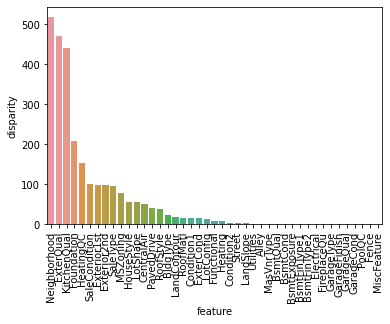

In [7]:
a = anova(train_data, qualitative)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
qualitative = a[a['disparity']>2.5*a['disparity'].median()]['feature']
print(qualitative)

4      OverallQual
26      GarageCars
27      GarageArea
19        FullBath
6        YearBuilt
23    TotRmsAbvGrd
16       GrLivArea
12     TotalBsmtSF
24      Fireplaces
1       MSSubClass
7     YearRemodAdd
Name: feature, dtype: object


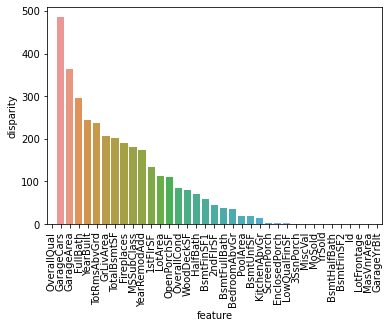

In [8]:
a = anova(train_data, quantitative)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
quantitative = a[a['disparity']>2.0*a['disparity'].median()]['feature']
print(quantitative)

In [9]:
# nanvalues = train_data.isnull().sum()
# blacklist = list(nanvalues[nanvalues>100].index) ### set blacklist threshold, columns with more than 100 NaN are removed from feature list
# blacklist = blacklist + ['Id', 'SalePrice', 'GarageYrBlt' ]
# allcolumns = list(train_data.columns)
# features = list(set(allcolumns).difference(blacklist))
# features = ['1stFlrSF', 'BsmtUnfSF', 'GarageArea', 'GrLivArea',  'LotArea', 'CentralAir', 'Neighborhood', 
#             'ExterQual', 'BsmtQual', 'KitchenQual', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
features = list(quantitative) + list(qualitative)

In [10]:
# var = 'OverallQual'
# data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="SalePrice", data=data)
# fig.axis(ymin=0, ymax=800000);

In [11]:
# var = 'YearBuilt'
# data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
# f, ax = plt.subplots(figsize=(16, 8))
# fig = sns.boxplot(x=var, y="SalePrice", data=data)
# fig.axis(ymin=0, ymax=800000);
# plt.xticks(rotation=90);

In [12]:
# correlation =  train_data.corr().sort_values('SalePrice', ascending=False)
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(correlation, vmax=0.9, square=False)

In [13]:
# correlation_features =  train_data[features+['SalePrice']].corr().sort_values('SalePrice', ascending=False)
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(correlation_features, vmax=0.9, square=False)

In [14]:
# k = 15 #number of variables for heatmap
# cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(train_data[cols].values.T)
# # cm = np.sort(cm, axis=0)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
#                  yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [15]:
# data = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [16]:
missing_data = train_data.isnull().sum()
print(missing_data.sort_values(ascending=False).head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64


In [17]:
# train_data_dropna = train_data.dropna(subset=features)
# print(train_data_dropna[features].describe())

In [18]:
# train_data = train_data.drop((missing_data[missing_data > 1]).index,1)
# train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)
train_data = train_data.fillna(train_data.median())
print(train_data[features].isnull().sum().sort_values(ascending=False).head(20))

OverallQual     0
GarageCars      0
GarageArea      0
FullBath        0
YearBuilt       0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
Fireplaces      0
MSSubClass      0
YearRemodAdd    0
Neighborhood    0
ExterQual       0
KitchenQual     0
Foundation      0
HeatingQC       0
dtype: int64


In [19]:
# sns.set()
# sns.pairplot(train_data[features+['SalePrice']], size = 2.5)
# plt.show();

In [20]:
# for var in features:
#     data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
#     data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [21]:
# # outliers!
# train_data = train_data.drop(train_data.loc[train_data['1stFlrSF']>3000].index)
# train_data = train_data.drop(train_data.loc[(train_data['GarageArea']>1200) & (train_data['SalePrice']<300000)].index)
# train_data = train_data.drop(train_data.loc[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<200000)].index)
# train_data = train_data.drop(train_data.loc[train_data['LotArea']>100000].index)

In [22]:
# var = 'SalePrice'
# sns.distplot(np.log(train_data[var]), fit=norm);
# fig = plt.figure()
# res = stats.probplot(np.log(train_data[var]), plot=plt)

In [23]:
# var = '1stFlrSF'
# sns.distplot(np.log(train_data[var]), fit=norm);
# fig = plt.figure()
# res = stats.probplot(np.log(train_data[var]), plot=plt)

In [24]:
# var = 'GarageArea'
# sns.distplot(train_data[var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train_data[var], plot=plt)

In [25]:
# var = 'GrLivArea'
# sns.distplot(train_data[var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train_data[var], plot=plt)

In [26]:
# var = 'LotArea'
# sns.distplot(train_data[var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train_data[var], plot=plt)

In [27]:
# var = 'OverallQual'
# sns.distplot(train_data[var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train_data[var], plot=plt)

In [28]:
# var = 'TotalBsmtSF'
# sns.distplot(train_data[var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train_data[var], plot=plt)

In [29]:
# var = 'YearBuilt'
# sns.distplot(train_data[var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train_data[var], plot=plt)

In [30]:
# var = 'YearRemodAdd'
# sns.distplot(train_data[var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train_data[var], plot=plt)

In [31]:
X_qualitative = pd.get_dummies(train_data[qualitative])
X = pd.concat([train_data[quantitative], X_qualitative], axis = 1)
# X = train_data[features]
y = train_data['SalePrice']

In [32]:
# from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, BaggingRegressor, RandomForestRegressor
# # from sklearn.tree import DecisionTreeRegressor
# # from sklearn.neighbors import KNeighborsRegressor
# # from sklearn.metrics import r2_score, mean_squared_error as MSE
# from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
# # from sklearn.linear_model import Lasso, Ridge, LinearRegression
# from sklearn.preprocessing import StandardScaler
# # import xgboost as xgb
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # params ={'DTR': {'max_depth': np.arange(1, 10,1), 'min_samples_leaf': np.arange(0.01, 0.2, 0.05)},
# #          'GBR': {'max_depth': np.arange(2, 3,1), 'n_estimators': np.arange(400, 500, 100)}}
# # kf = KFold(n_splits=10, shuffle=True, random_state=10)
# scale = StandardScaler()


# # model = GradientBoostingRegressor(random_state=42)
# x_train_scaled = scale.fit_transform(x_train)
# x_test_scaled = scale.transform(x_test)
# # gridsearch = GridSearchCV(model, param_grid=params['GBR'], cv=kf, n_jobs=-1)

# # gridsearch.fit(x_train_scaled, y_train)
# # y_pred = gridsearch.predict(x_test_scaled)
# # report = r2_score(y_test, y_pred)
# # rmse = MSE(y_test, y_pred)**0.5

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error as MSE
import xgboost as xgb

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train_scaled, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scale = StandardScaler()
x_train_scaled = scale.fit_transform(X)
# x_test_scaled = scale.transform(x_test)

params ={'max_depth': np.arange(2, 10,1), 'n_estimators': np.arange(100, 500, 100)}


model_xgb = xgb.XGBRegressor(max_depth=2, n_estimators=200, random_state=42).fit(x_train_scaled, y)
# kf = KFold(n_splits=10, shuffle=True, random_state=10)
# gridsearch = GridSearchCV(model_xgb, param_grid=params, cv=kf, n_jobs=-1)
# gridsearch.fit(x_train_scaled, y_train)
# y_pred = gridsearch.predict(x_test_scaled)
# report = r2_score(y_test, y_pred)
# rmse = MSE(y_test, y_pred)**0.5
cv_xgb = rmse_cv(model_xgb).mean()
print(cv_xgb)

model_gbr = GradientBoostingRegressor(max_depth=2, n_estimators=400, random_state=42).fit(x_train_scaled, y)
cv_gbr = rmse_cv(model_gbr).mean()
print(cv_gbr)

model_ridge = RidgeCV()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
print(min(cv_ridge))

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train_scaled, y)
rmse_cv(model_lasso).mean()

28423.18679111779
27132.218046831822
33030.77593830255


33306.26184650235

In [34]:
# # Create a pd.Series of features importances
# importances_rf = pd.Series(gridsearch.best_estimator_.feature_importances_, index = X.columns)
# # Sort importances_rf
# sorted_importances_rf = importances_rf.sort_values()
# # Make a horizontal bar plot
# sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

In [35]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
# print(len(test_data))
# print(len(test_data_dropna))
# test_data = missing(test_data)
x_test = test_data[features].fillna(test_data[features].median())

# missing_data = test_data.isnull().sum()

# test_data = test_data.drop((missing_data[missing_data > 1]).index,1)
# test_data = test_data.drop(test_data.loc[test_data['Electrical'].isnull()].index)
print(x_test[features].isnull().sum().sort_values(ascending=False).head(20))
# test_data = test_data[features].fillna(0)
X_qualitative2 = pd.get_dummies(x_test[qualitative])
x_test = pd.concat([x_test[quantitative], X_qualitative2], axis = 1)

x_test_scaled = scale.transform(x_test)

predictions = model_gbr.predict(x_test_scaled)

output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

KitchenQual     1
OverallQual     0
GarageCars      0
GarageArea      0
FullBath        0
YearBuilt       0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
Fireplaces      0
MSSubClass      0
YearRemodAdd    0
Neighborhood    0
ExterQual       0
Foundation      0
HeatingQC       0
dtype: int64
Your submission was successfully saved!
